# Project Goal 
> - To predict what percentage of a Teams overall budget will be paid to the quarterback

# Project Description
> - Using data aquired from various websites we ran correlation tests to find the most statistically significant features

# Initial Hypothesis
> - Players who extend the season of their team I.E playoffs will have a higher percentage of their teams salary cap
> - Players who have more yards and touchdowns will have a higher percentage of their teams salary cap
> - Players who have more interceptions will have a lower percentage of their teams salary cap
> - Players who have a higher passer rating will have a higher percentage of their teams salary cap

# Imports

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import TweedieRegressor
import wrangle
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from pydataset import data
from sklearn.linear_model import LinearRegression
import random
random.seed(10)

In [2]:
df = pd.read_csv('last_csv.csv',index_col=[0])

# Acquire
> * Data acquired from:
    - https://overthecap.com/position/quarterback
    - https://overthecap.com/contract-history/quarterback
    - https://nextgenstats.nfl.com/stats/passing/2022/REG/all#yards
    - https://www.pro-football-reference.com/years/2022/passing.htm
> * Combined multiple csv's and added additionals column to give percentage of wins and losses
> * Cached combined file to local csv
> * Each row player stats throughout a specific year

# Prepare
> * Visualized full dataset for univariate exploration
      * Histograms different types of distributions

> * Verified datatypes
> * Corrected column names
> * Checked for nulls and removed them
> * Split the data, stratifying on target variable

In [3]:
df.head()

team  year  games_played   comp    att  comp_pct     yds  \
name                                                                      
Blaine Gabbert  JAX  2011          15.0  210.0  413.0      50.8  2214.0   
Blaine Gabbert  JAX  2012          10.0  162.0  278.0      58.3  1662.0   
Blaine Gabbert   SF  2015           8.0  178.0  282.0      63.1  2031.0   
Blaine Gabbert   SF  2016           6.0   91.0  160.0      56.9   925.0   
Blaine Gabbert  ARI  2017           5.0   95.0  171.0      55.6  1086.0   

                avg_yds_per_att    td   int  ...  loss  wild_card  div_rnd  \
name                                         ...                             
Blaine Gabbert              5.4  12.0  11.0  ...    10        0.0      0.0   
Blaine Gabbert              6.0   9.0   6.0  ...     9        0.0      0.0   
Blaine Gabbert              7.2  10.0   7.0  ...     5        0.0      0.0   
Blaine Gabbert              5.8   5.0   6.0  ...     4        0.0      0.0   
Blaine Gabbert              6.4   6.0   6.0  ...     3        0.0      0.0   

                conf_rnd  superbowl superbowl_win  win_perc  loss_perc  \
name                                                                     
Blaine Gabbert       0.0        0.0           0.0      0.27       0.67   
Blaine Gabbert       0.0        0.0           0.0      0.10       0.90   
Blaine Gabbert       0.0        0.0           0.0      0.38       0.62   
Blaine Gabbert       0.0        0.0           0.0      0.17       0.67   
Blaine Gabbert       0.0        0.0           0.0      0.40       0.60   

               td_per_game  sk_per_game  
name                                     
Blaine Gabbert        0.80         2.67  
Blaine Gabbert        0.90         2.20  
Blaine Gabbert        1.25         3.12  
Blaine Gabbert        0.83         1.83  
Blaine Gabbert        1.20         4.60  

[5 rows x 41 columns]

In [4]:
train, validate, test = wrangle.split_data(df)
columns_list, target, corr_test = wrangle.get_target_and_columns(df, train)

# Univariate Analysis

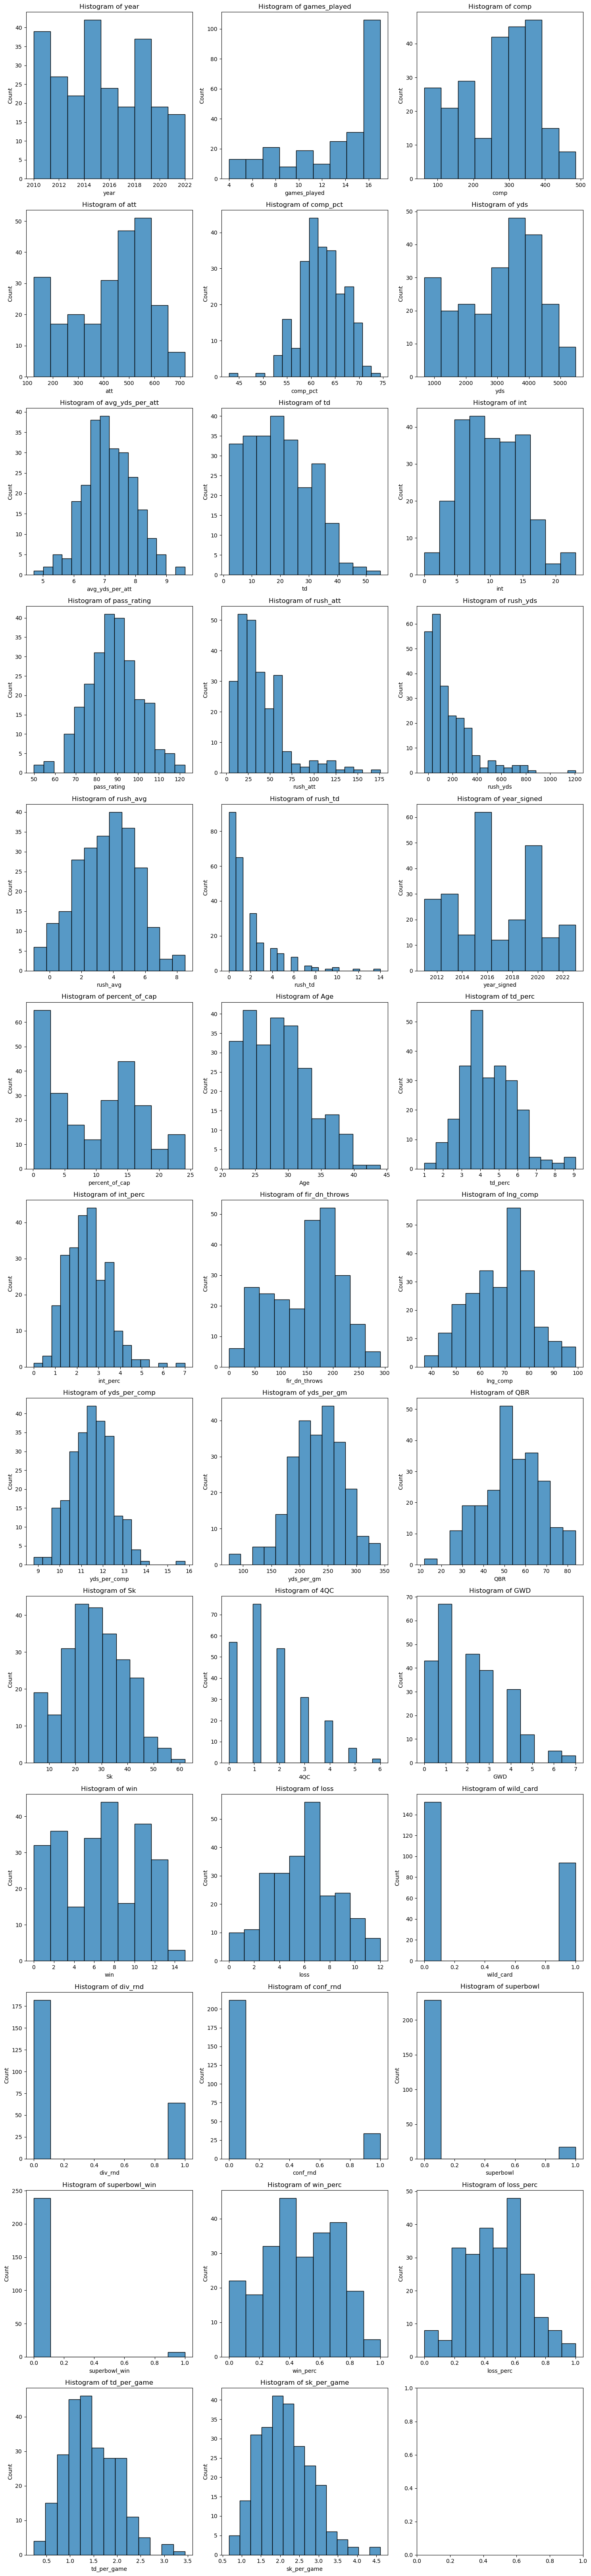

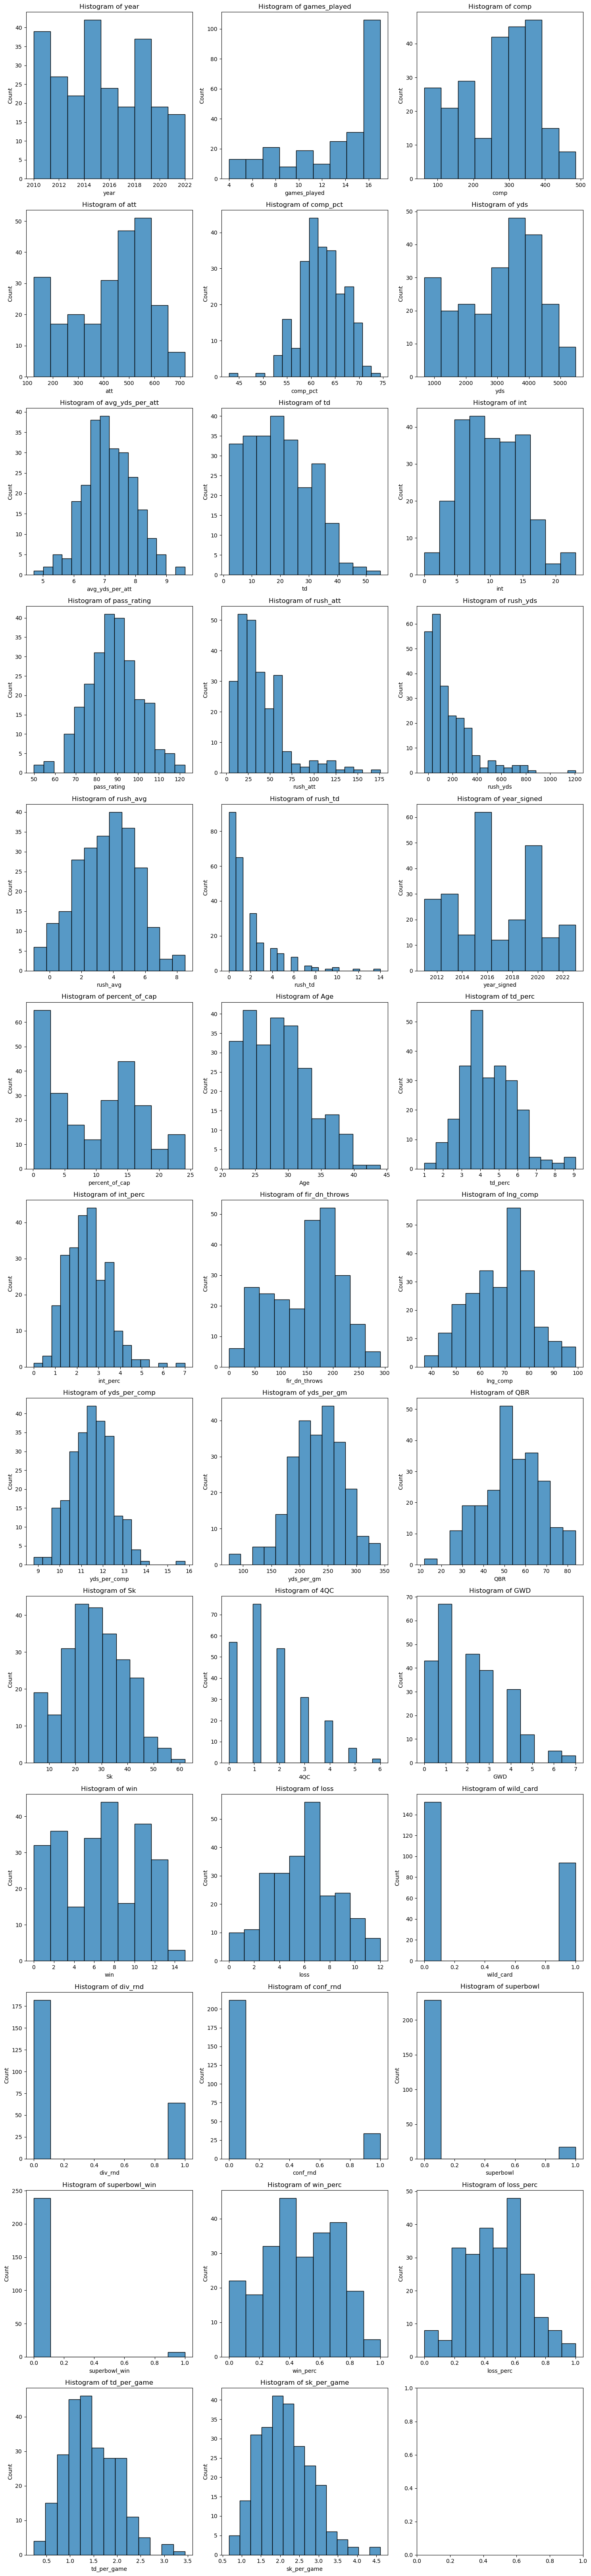

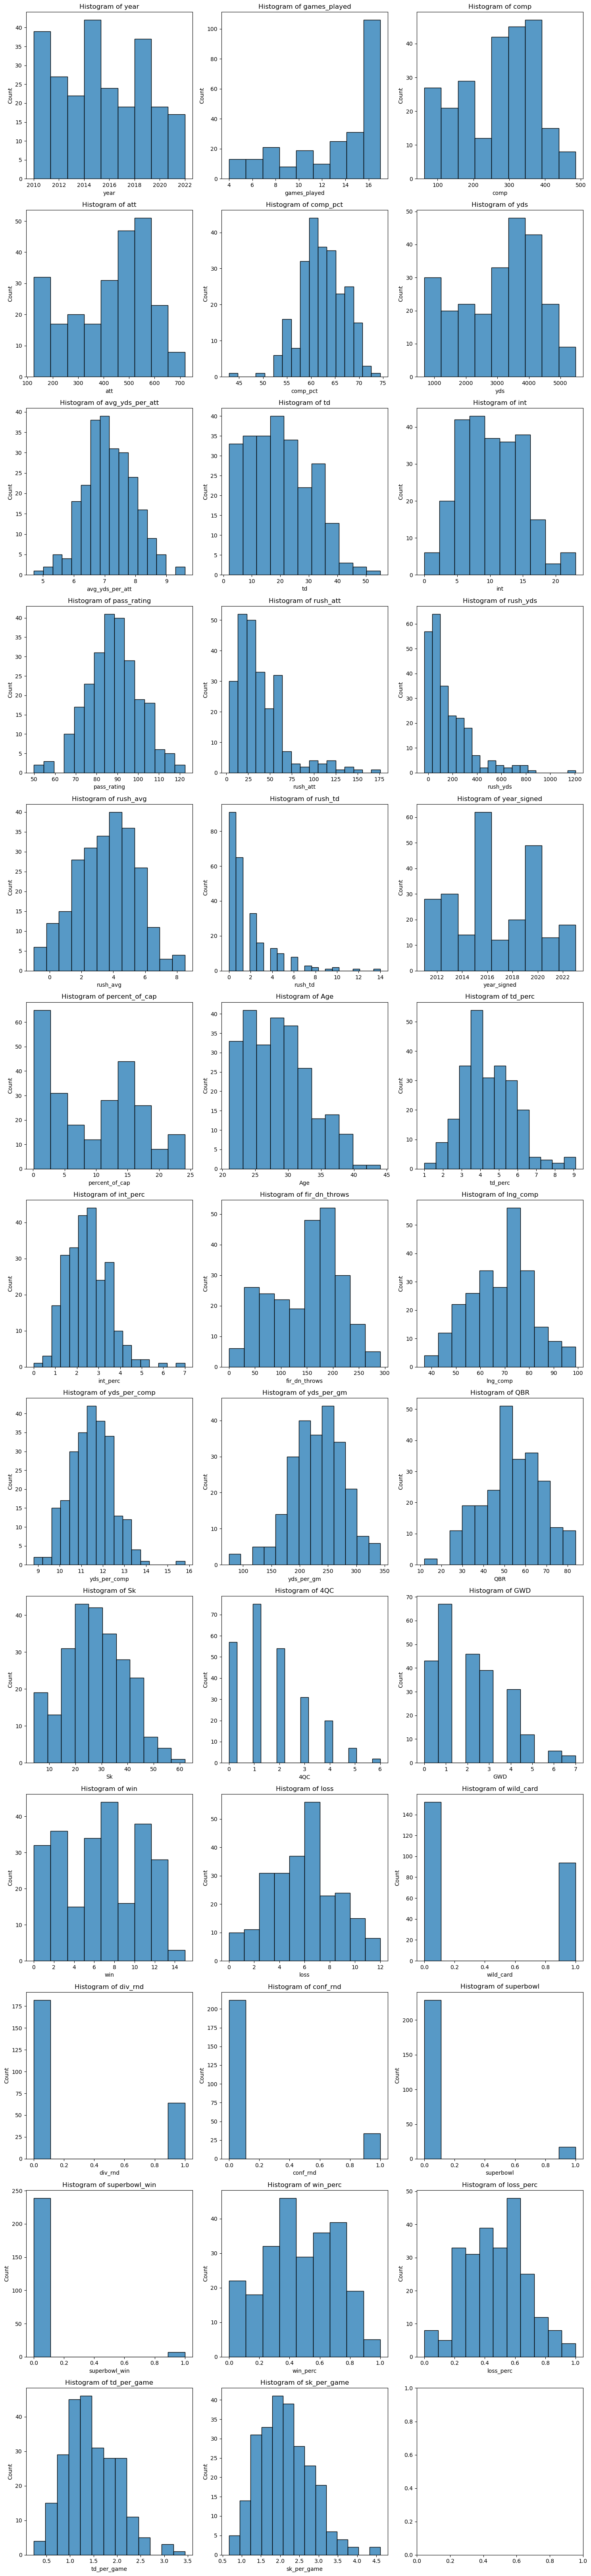

In [5]:
wrangle.new_visual_univariate_findings(train)

In [6]:
wrangle.univariate_findings()

Feature           Distribution
0      games_played            left_skewed
1              comp  non-symmetric bimodal
2               att  non-symmetric bimodal
3          comp_pct               normally
4               yds  non-symmetric bimodal
5   avg_yds_per_att               normally
6                td           right-skewed
7               int           right-skewed
8       pass_rating               normally
9          rush_att           right-skewed
10         rush_yds           right-skewed
11         rush_avg               normally
12          rush_td           right-skewed
13              age           right-skewed
14          td_perc               normally
15         int_perc  non-symmetric bimodal
16    fir_dn_throws  non-symmetric bimodal
17         Lng_comp               normally
18     yds_per_comp               normally
19       yds_per_gm               normally
20              QBR               normally
21               sk               normally
22              4QC           right-skewed
23              GWD           right-skewed

# Univariate Exploration Summary


# Bivariate Analysis

$H_0$: There is no correlation between our selected features and our target variable.

$H_\alpha$: There is a correlation between our selected features and our target variable.

$\alpha$: 0.05

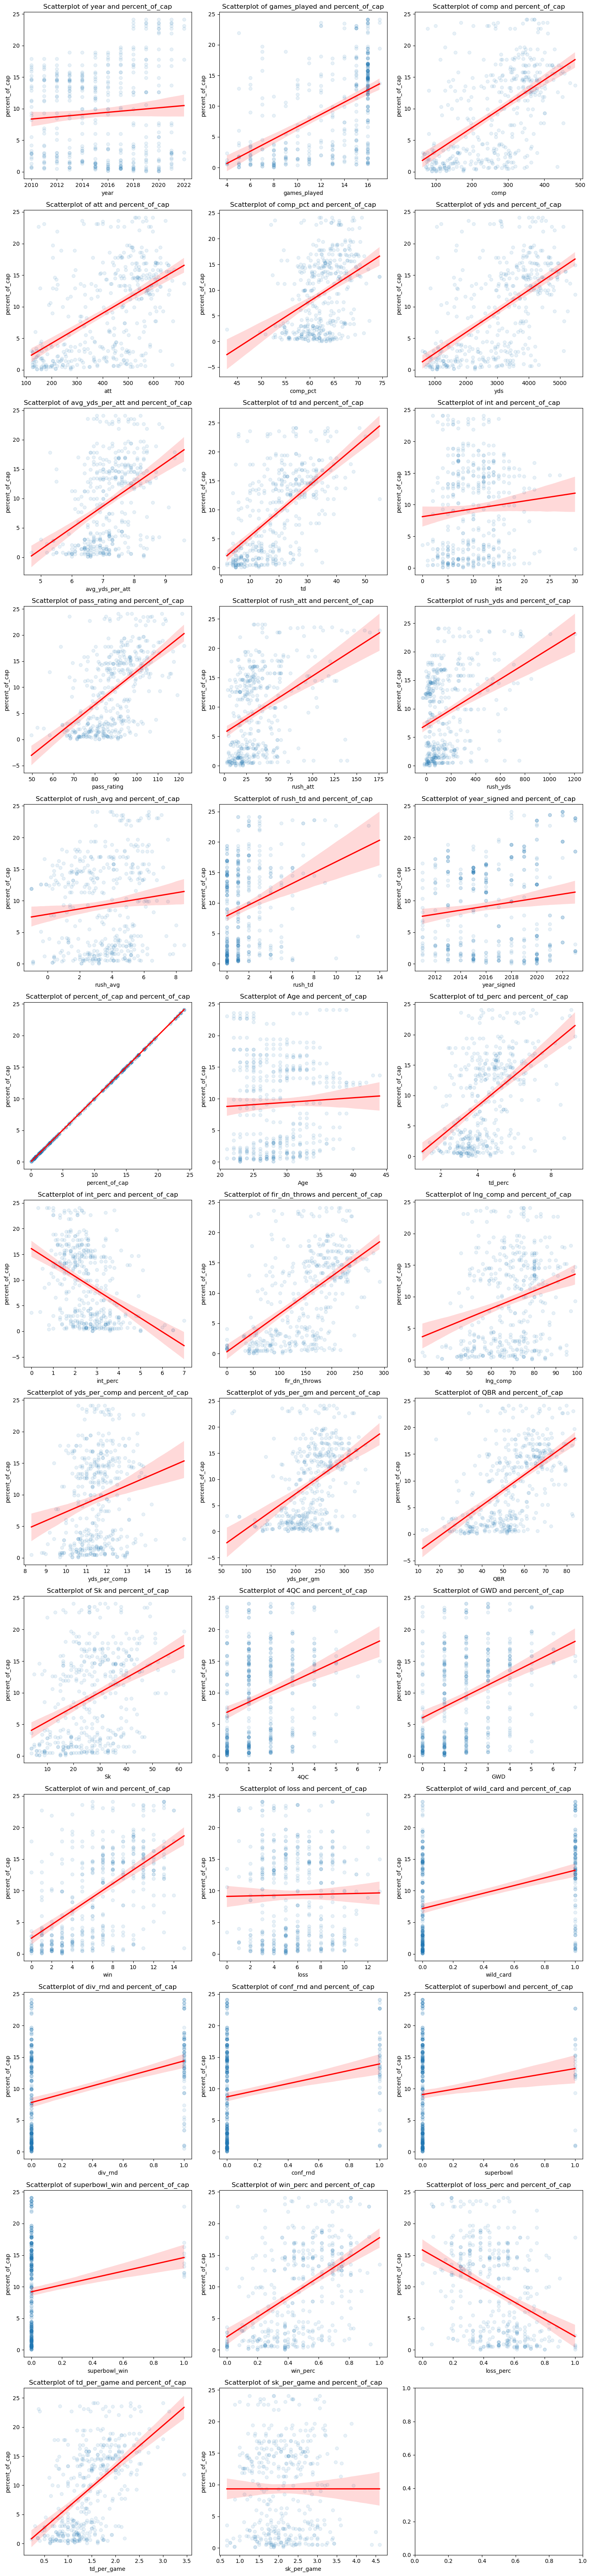

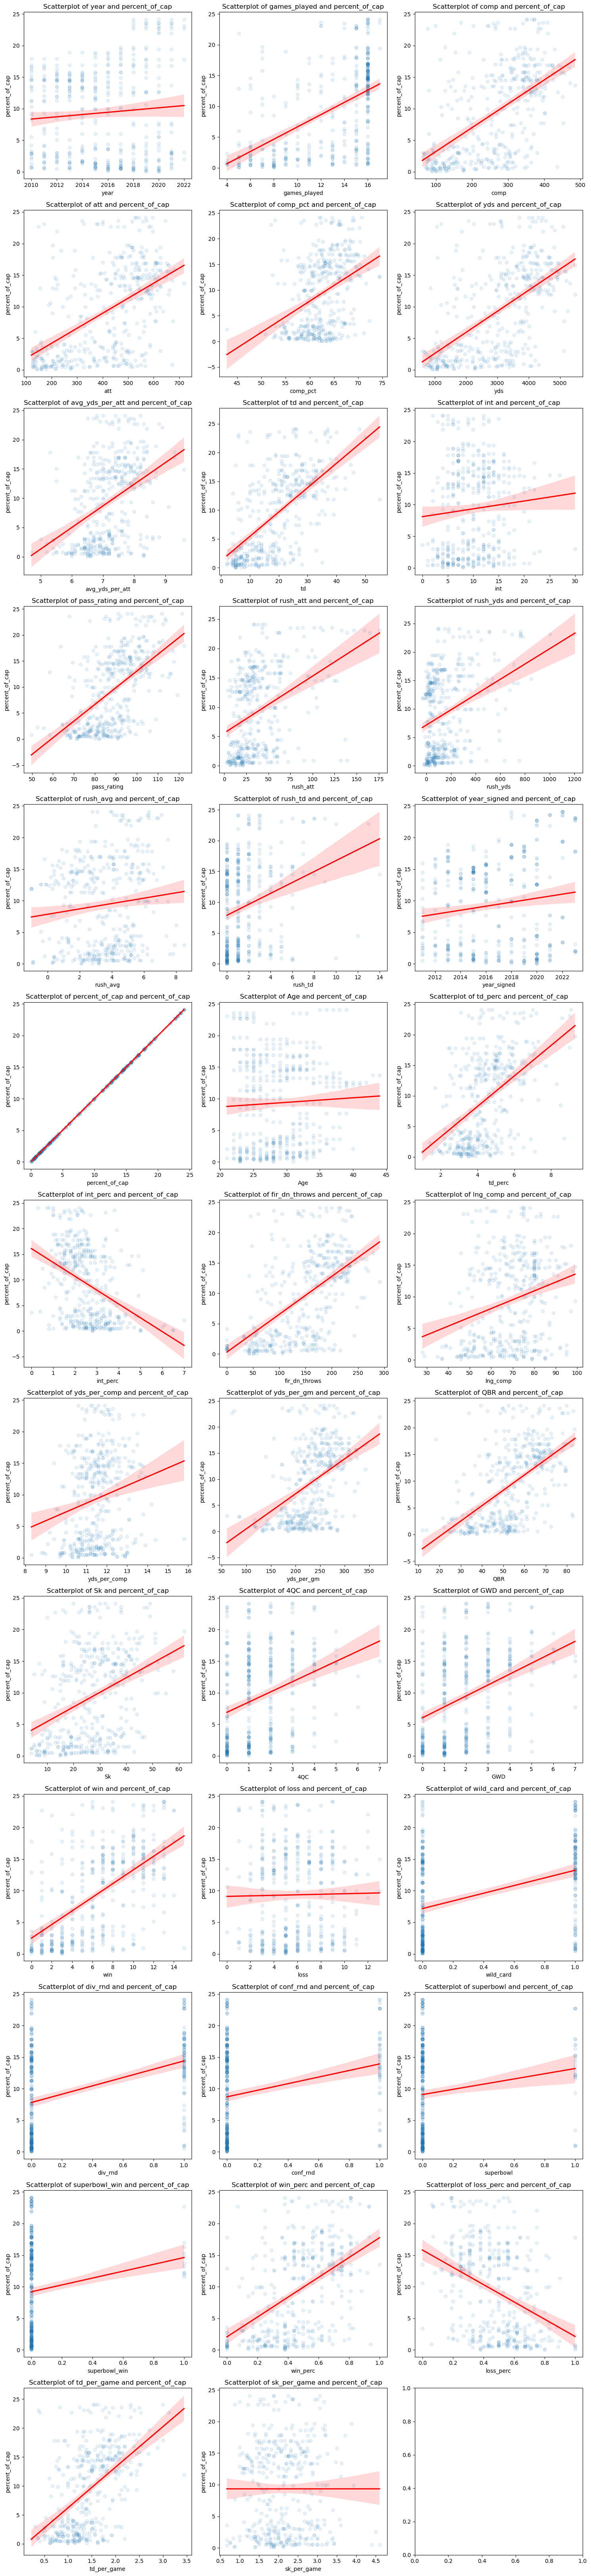

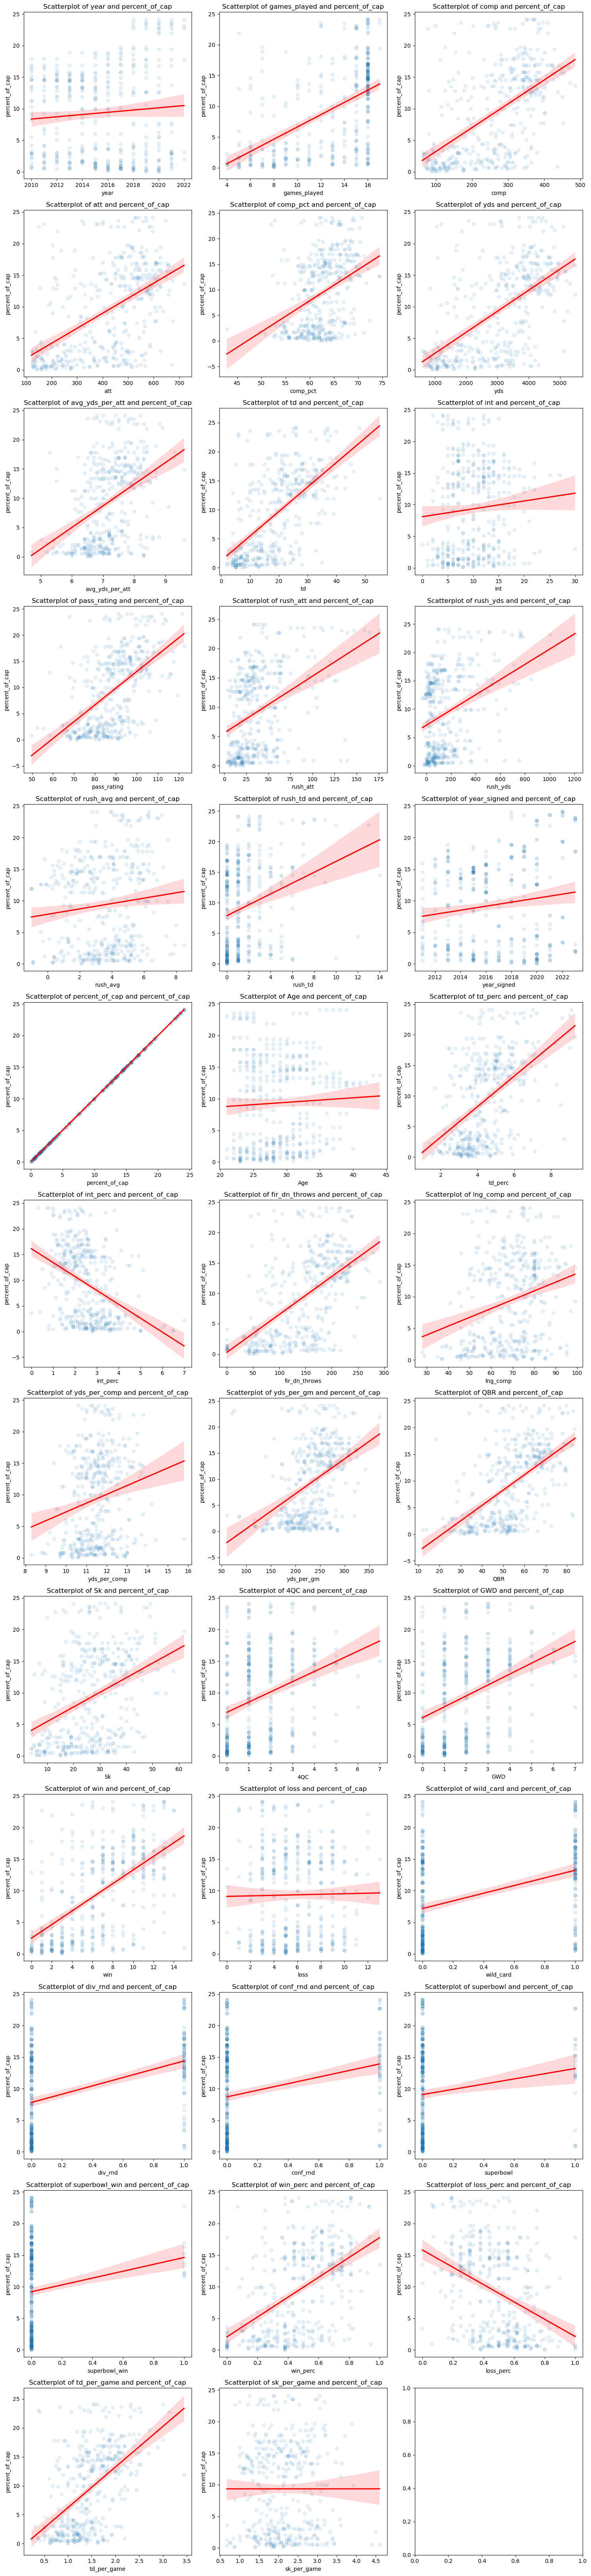

In [7]:
wrangle.new_visual_multivariate_findings(df, target)

# Bivariate Exploration Summary


In [8]:
wrangle.get_explore_data(columns_list, corr_test)

Features Correlation Moving Forward
0              year    Negative             No
1      games_played    Positive             No
2              comp    Negative             No
3               att    Positive             No
4          comp_pct    Positive             No
5               yds    Positive             No
6   avg_yds_per_att    Positive             No
7                td    Positive             No
8               int    Positive            Yes
9       pass_rating    Positive            Yes
10         rush_att    Positive            Yes
11         rush_yds    Positive            Yes
12         rush_avg    Positive            Yes
13          rush_td    Positive            Yes
14      year_signed    Positive            Yes
15              Age    Positive            Yes
16          td_perc    Positive            Yes
17         int_perc    Negative            Yes
18    fir_dn_throws    Positive            Yes
19         lng_comp    Positive            Yes
20     yds_per_comp    Positive            Yes
21       yds_per_gm    Positive            Yes
22              QBR    Positive            Yes
23               Sk    Negative            Yes
24              4QC    Positive            Yes
25              GWD    Positive            Yes
26              win    Positive            Yes
27             loss    Positive            Yes
28        wild_card    Positive            Yes
29          div_rnd    Positive            Yes
30         conf_rnd    Positive            Yes
31        superbowl    Positive            Yes
32    superbowl_win    Positive            Yes
33         win_perc    Positive            Yes
34        loss_perc    Positive            Yes
35      td_per_game    Positive            Yes
36      sk_per_game    Positive            Yes

# Correlation Tests

> - We will use a confidence interval of 95%
> - the resulting alpha is .05

$H_0$: There is no statistical significance between our selected features and our target variable.

$H_\alpha$: There is a statistical significance between our selected features and our target variable.

$\alpha$: 0.05

In [9]:
corr_test.sort_values(by= 'p')

feature         r             p          target
36              win  0.620792  1.323882e-27  percent_of_cap
35               td  0.601081  1.486490e-25  percent_of_cap
34              yds  0.574484  5.292411e-23  percent_of_cap
33    fir_dn_throws  0.563590  5.050176e-22  percent_of_cap
32              QBR  0.563277  5.381325e-22  percent_of_cap
31             comp  0.556350  2.160952e-21  percent_of_cap
30     games_played  0.554204  3.302561e-21  percent_of_cap
29         win_perc  0.550116  7.346897e-21  percent_of_cap
28      pass_rating  0.540268  4.823076e-20  percent_of_cap
27              att  0.525681  7.010624e-19  percent_of_cap
26      td_per_game  0.496342  1.049815e-16  percent_of_cap
25          td_perc  0.480662  1.261201e-15  percent_of_cap
24        wild_card  0.475994  2.580610e-15  percent_of_cap
23        loss_perc -0.434444  9.549557e-13  percent_of_cap
22          div_rnd  0.434338  9.685576e-13  percent_of_cap
21         rush_att  0.432117  1.299444e-12  percent_of_cap
20  avg_yds_per_att  0.415561  1.087772e-11  percent_of_cap
19       yds_per_gm  0.415388  1.111615e-11  percent_of_cap
18         comp_pct  0.399864  7.345001e-11  percent_of_cap
17         int_perc -0.393903  1.478336e-10  percent_of_cap
16               Sk  0.379545  7.534710e-10  percent_of_cap
15              GWD  0.378387  8.562896e-10  percent_of_cap
14         rush_yds  0.363962  4.042787e-09  percent_of_cap
13         lng_comp  0.306278  9.705150e-07  percent_of_cap
12              4QC  0.298670  1.843003e-06  percent_of_cap
11         conf_rnd  0.264205  2.697335e-05  percent_of_cap
10          rush_td  0.262647  3.020067e-05  percent_of_cap
9      yds_per_comp  0.190986  2.629944e-03  percent_of_cap
8       year_signed  0.165629  9.253253e-03  percent_of_cap
7     superbowl_win  0.116044  6.922477e-02  percent_of_cap
6         superbowl  0.115471  7.061938e-02  percent_of_cap
5               int  0.092989  1.458897e-01  percent_of_cap
4              year  0.089757  1.604850e-01  percent_of_cap
3          rush_avg  0.081068  2.051141e-01  percent_of_cap
2              loss -0.030341  6.358103e-01  percent_of_cap
1               Age  0.019675  7.588122e-01  percent_of_cap
0       sk_per_game -0.014776  8.176378e-01  percent_of_cap

In [10]:
columns_list = corr_test.feature[corr_test.p < .05].to_list()

# Modeling

- We will use RMSE as our evaluation metric

** by using baseline as an evaluation metric we can be accurate to within 6.9 <br>
** 6.9 will be the baseline RMSE we will use for this project <br>
<br>
** I will be evaluating models developed using four different model types and various hyperparameter configurations * Models will be evaluated on train and validate data * The model that performs the best will then be evaluated on test data

## Features we are moving forward with

In [11]:
corr_test[corr_test.p < .05].sort_values(by='p').reset_index().drop(columns ='index')

feature         r             p          target
0               win  0.620792  1.323882e-27  percent_of_cap
1                td  0.601081  1.486490e-25  percent_of_cap
2               yds  0.574484  5.292411e-23  percent_of_cap
3     fir_dn_throws  0.563590  5.050176e-22  percent_of_cap
4               QBR  0.563277  5.381325e-22  percent_of_cap
5              comp  0.556350  2.160952e-21  percent_of_cap
6      games_played  0.554204  3.302561e-21  percent_of_cap
7          win_perc  0.550116  7.346897e-21  percent_of_cap
8       pass_rating  0.540268  4.823076e-20  percent_of_cap
9               att  0.525681  7.010624e-19  percent_of_cap
10      td_per_game  0.496342  1.049815e-16  percent_of_cap
11          td_perc  0.480662  1.261201e-15  percent_of_cap
12        wild_card  0.475994  2.580610e-15  percent_of_cap
13        loss_perc -0.434444  9.549557e-13  percent_of_cap
14          div_rnd  0.434338  9.685576e-13  percent_of_cap
15         rush_att  0.432117  1.299444e-12  percent_of_cap
16  avg_yds_per_att  0.415561  1.087772e-11  percent_of_cap
17       yds_per_gm  0.415388  1.111615e-11  percent_of_cap
18         comp_pct  0.399864  7.345001e-11  percent_of_cap
19         int_perc -0.393903  1.478336e-10  percent_of_cap
20               Sk  0.379545  7.534710e-10  percent_of_cap
21              GWD  0.378387  8.562896e-10  percent_of_cap
22         rush_yds  0.363962  4.042787e-09  percent_of_cap
23         lng_comp  0.306278  9.705150e-07  percent_of_cap
24              4QC  0.298670  1.843003e-06  percent_of_cap
25         conf_rnd  0.264205  2.697335e-05  percent_of_cap
26          rush_td  0.262647  3.020067e-05  percent_of_cap
27     yds_per_comp  0.190986  2.629944e-03  percent_of_cap
28      year_signed  0.165629  9.253253e-03  percent_of_cap

In [12]:
# splitting the data in its respective catagory
X_train, X_validate, X_test, y_train, y_validate, y_test = wrangle.get_X_train_val_test(train,validate, test, columns_list,target)

In [13]:
# Scaling on selected features to be sent into model
X_train, X_validate, X_test = wrangle.scale_data(X_train, X_validate,X_test,cols = columns_list)

In [14]:
# Running the data through the models
df1, df2, df3,predict_linear, feature_weights, predict_linear_test  = wrangle.get_model_numbers(X_train, X_validate, X_test, y_train, y_validate, y_test)

In [15]:
train['predicted'] = predict_linear.tolist()

# Looking at predicted vs actual for a given year

In [16]:
pd.set_option('display.max_rows', None)
train[['predicted','percent_of_cap', 'year']].sort_values(by=['percent_of_cap','year'], ascending = False)

predicted  percent_of_cap  year
name                                               
Aaron Rodgers        9.621794            24.1  2022
Aaron Rodgers       19.618208            24.1  2020
Aaron Rodgers       16.053070            24.1  2019
Josh Allen          19.822399            23.6  2021
Josh Allen          18.244566            23.6  2020
Josh Allen          12.567256            23.6  2019
Josh Allen           9.778426            23.6  2018
Russell Wilson      18.218717            23.5  2019
Lamar Jackson       18.995525            23.1  2022
Lamar Jackson       26.393600            23.1  2019
Lamar Jackson       13.867264            23.1  2018
Jalen Hurts         15.690051            22.7  2021
Patrick Mahomes     19.736380            22.7  2020
Patrick Mahomes     20.572281            22.7  2018
Deshaun Watson      18.376924            19.7  2018
Derek Carr          18.205609            19.4  2021
Derek Carr          13.058868            19.4  2019
Derek Carr          11.794637            19.4  2018
Derek Carr           8.929325            19.4  2017
Aaron Rodgers       16.609912            18.9  2015
Aaron Rodgers       18.720402            18.9  2014
Aaron Rodgers        9.865312            18.9  2013
Russell Wilson      19.336577            18.6  2018
Russell Wilson      13.654773            18.6  2016
Ben Roethlisberger  12.410120            18.1  2016
Ben Roethlisberger  13.823176            18.1  2015
Aaron Rodgers       18.204765            17.9  2012
Aaron Rodgers       19.869370            17.9  2011
Aaron Rodgers       15.870579            17.9  2010
Daniel Jones        18.757154            17.8  2022
Daniel Jones         8.029864            17.8  2021
Daniel Jones        13.584223            17.8  2020
Jared Goff          14.604043            17.8  2018
Jared Goff          12.809354            17.8  2017
Carson Wentz        17.071337            17.0  2019
Carson Wentz        17.248571            17.0  2017
Carson Wentz         8.236977            17.0  2016
Matt Ryan           15.559039            16.9  2018
Matt Ryan           11.347067            16.9  2015
Matt Ryan           12.951875            16.9  2013
Matt Ryan           16.795016            16.9  2012
Matt Ryan           11.913911            16.9  2010
Kirk Cousins        14.888356            16.8  2020
Kirk Cousins        13.504708            16.6  2019
Drew Brees          13.749548            16.6  2010
Joe Flacco           8.369597            16.3  2012
Joe Flacco          10.781633            16.3  2011
Joe Flacco          12.315108            16.3  2010
Dak Prescott        17.184592            15.8  2018
Dak Prescott        14.667813            15.8  2017
Kirk Cousins        12.463683            15.8  2017
Andrew Luck         12.626085            15.8  2016
Dak Prescott        13.760929            15.8  2016
Andrew Luck          7.531395            15.8  2015
Andrew Luck         14.952519            15.8  2014
Andrew Luck         14.395900            15.8  2013
Andrew Luck         10.447069            15.8  2012
Drew Brees          13.842311            15.6  2014
Drew Brees          16.757619            15.6  2013
Drew Brees          11.309394            15.6  2012
Russell Wilson      20.913450            15.3  2014
Russell Wilson      16.680116            15.3  2013
Russell Wilson      14.055648            15.3  2012
Ben Roethlisberger  11.839603            15.2  2013
Ben Roethlisberger  11.120405            15.2  2012
Derek Carr           9.167803            15.0  2015
Ryan Tannehill      15.370164            14.9  2020
Ryan Tannehill      11.543858            14.9  2019
Jacoby Brissett     11.085846            14.9  2017
Eli Manning         11.752664            14.7  2015
Eli Manning          8.279721            14.7  2012
Eli Manning         13.052285            14.7  2011
Tony Romo           11.231937            14.6  2013
Tony Romo           10.314240            14.6  2011
Cam Newton          12.321056            14.5  2014
Philip Rivers   

## Train Data

In [17]:
# Models on the training data
df1

model_train      rmse        r2
0                        baseline  7.105761  0.000000
1     ordinary least squared(OLS)  4.714900  0.559725
2                lasso lars(lars)  6.552030  0.149781
3    Polynomial Regression(poly2)  0.032821  0.999979
4  Generalized Linear Model (GLM)  5.432543  0.415499
5         Random Forest Regressor  1.859801  0.931497

## Validate Data

In [18]:
# Models on the validate data
df2

model_validate          rmse            r2
0                        baseline  7.105761e+00  0.000000e+00
1     ordinary least squared(OLS)  5.261772e+00  4.079147e-01
2                lasso lars(lars)  6.701426e+00  3.959454e-02
3    Polynomial Regression(poly2)  2.385521e+06 -1.216989e+11
4  Generalized Linear Model (GLM)  5.457471e+00  3.630533e-01
5         Random Forest Regressor  4.860596e+00  4.947582e-01

## Test Data

In [19]:
# Model on the unseen test data
df3

model_validate      rmse        r2
0                     baseline  7.105761  0.000000
1  ordinary least squared(OLS)  5.735874  0.434417

# Using fold method for splitting data

In [20]:
# Running the data through the models with the new train, test method.
master_df,best_parameters = wrangle.run_fold(df, columns_list, target)

In [21]:
master_df

alpha fit_intercept verbose      score               model  n_jobs  \
2     1.0         False    True   5.858883                lars     NaN   
3     1.0         False   False   5.858883                lars     NaN   
6     2.0         False    True   6.514026                lars     NaN   
7     2.0         False   False   6.514026                lars     NaN   
0     1.0          True    True   6.726647                lars     NaN   
1     1.0          True   False   6.726647                lars     NaN   
76   20.0          True    True   7.127609                lars     NaN   
32    9.0          True    True   7.127609                lars     NaN   
33    9.0          True   False   7.127609                lars     NaN   
36   10.0          True    True   7.127609                lars     NaN   
37   10.0          True   False   7.127609                lars     NaN   
73   19.0          True   False   7.127609                lars     NaN   
72   19.0          True    True   7.127609                lars     NaN   
40   11.0          True    True   7.127609                lars     NaN   
41   11.0          True   False   7.127609                lars     NaN   
44   12.0          True    True   7.127609                lars     NaN   
68   18.0          True    True   7.127609                lars     NaN   
69   18.0          True   False   7.127609                lars     NaN   
60   16.0          True    True   7.127609                lars     NaN   
48   13.0          True    True   7.127609                lars     NaN   
49   13.0          True   False   7.127609                lars     NaN   
52   14.0          True    True   7.127609                lars     NaN   
53   14.0          True   False   7.127609                lars     NaN   
65   17.0          True   False   7.127609                lars     NaN   
64   17.0          True    True   7.127609                lars     NaN   
56   15.0          True    True   7.127609                lars     NaN   
57   15.0          True   False   7.127609                lars     NaN   
45   12.0          True   False   7.127609                lars     NaN   
29    8.0          True   False   7.127609                lars     NaN   
77   20.0          True   False   7.127609                lars     NaN   
16    5.0          True    True   7.127609                lars     NaN   
4     2.0          True    True   7.127609                lars     NaN   
5     2.0          True   False   7.127609                lars     NaN   
8     3.0          True    True   7.127609                lars     NaN   
9     3.0          True   False   7.127609                lars     NaN   
12    4.0          True    True   7.127609                lars     NaN   
13    4.0          True   False   7.127609                lars     NaN   
28    8.0          True    True   7.127609                lars     NaN   
17    5.0          True   False   7.127609                lars     NaN   
61   16.0          True   False   7.127609                lars     NaN   
25    7.0          True   False   7.127609                lars     NaN   
21    6.0          True   False   7.127609                lars     NaN   
24    7.0          True    True   7.127609                lars     NaN   
20    6.0          True    True   7.127609                lars     NaN   
10    3.0         False    True   7.184742                lars     NaN   
11    3.0         False   False   7.184742                lars     NaN   
15    4.0         False   False   8.010327                lars     NaN   
14    4.0         False    True   8.010327                lars     NaN   
19    5.0         False   False   8.961558                lars     NaN   
18    5.0         False    True   8.961558                lars     NaN   
22    6.0         False    True  10.002176                lars     NaN   
23    6.0         False   False  10.002176                lars     NaN   
26    7.0         False    True  11.106829                lars     NaN   
27    7.

In [22]:
# Running the test data through the models
best_parameters

model_validate      rmse       r2
0          baseline  7.140633  0.00000
1  lasso lars(lars)  6.258431  0.26245

# Modeling Summary
> - Our ordinary least squared(OLS) performed best with an RMSE score of 5.479861e+00 in validate
> - Our unseen test data beat baseline

# Conclusion

> - The different columns were distributed in differently see above for a chart

### Features that were statistically significant

In [23]:
corr_test[corr_test.p < .05].sort_values(by='p').reset_index().drop(columns ='index')

feature         r             p          target
0               win  0.620792  1.323882e-27  percent_of_cap
1                td  0.601081  1.486490e-25  percent_of_cap
2               yds  0.574484  5.292411e-23  percent_of_cap
3     fir_dn_throws  0.563590  5.050176e-22  percent_of_cap
4               QBR  0.563277  5.381325e-22  percent_of_cap
5              comp  0.556350  2.160952e-21  percent_of_cap
6      games_played  0.554204  3.302561e-21  percent_of_cap
7          win_perc  0.550116  7.346897e-21  percent_of_cap
8       pass_rating  0.540268  4.823076e-20  percent_of_cap
9               att  0.525681  7.010624e-19  percent_of_cap
10      td_per_game  0.496342  1.049815e-16  percent_of_cap
11          td_perc  0.480662  1.261201e-15  percent_of_cap
12        wild_card  0.475994  2.580610e-15  percent_of_cap
13        loss_perc -0.434444  9.549557e-13  percent_of_cap
14          div_rnd  0.434338  9.685576e-13  percent_of_cap
15         rush_att  0.432117  1.299444e-12  percent_of_cap
16  avg_yds_per_att  0.415561  1.087772e-11  percent_of_cap
17       yds_per_gm  0.415388  1.111615e-11  percent_of_cap
18         comp_pct  0.399864  7.345001e-11  percent_of_cap
19         int_perc -0.393903  1.478336e-10  percent_of_cap
20               Sk  0.379545  7.534710e-10  percent_of_cap
21              GWD  0.378387  8.562896e-10  percent_of_cap
22         rush_yds  0.363962  4.042787e-09  percent_of_cap
23         lng_comp  0.306278  9.705150e-07  percent_of_cap
24              4QC  0.298670  1.843003e-06  percent_of_cap
25         conf_rnd  0.264205  2.697335e-05  percent_of_cap
26          rush_td  0.262647  3.020067e-05  percent_of_cap
27     yds_per_comp  0.190986  2.629944e-03  percent_of_cap
28      year_signed  0.165629  9.253253e-03  percent_of_cap

### NLP Insights

In [24]:
# import w_wrangle as wran

In [25]:
# #Acquire and Prepare

# comm = wran.acquire_commentary()
# comm.player_commentary = comm.player_commentary.apply(wran.clean_strings)

# comm.head()

In [26]:
# # Get grams to put into visualizations

# unigram_high_words, unigram_mid_words, unigram_low_words, bi_tri_high_words, bi_tri_mid_words, bi_tri_low_words = wran.get_grams(comm)

In [27]:
# #Unigram visualizations

# wran.viz_unigrams(unigram_high_words, unigram_mid_words, unigram_low_words)

In [28]:
# #Bigram visualizations

# wran.viz_bigrams(bi_tri_high_words, bi_tri_mid_words, bi_tri_low_words)

In [29]:
# #Trigram visualizations

# wran.viz_trigrams(bi_tri_high_words, bi_tri_mid_words, bi_tri_low_words)

### Sentiment Analysis

In [30]:
# #Get Sentiment Scores

# wran.get_sia_scores(comm)

### Key Findings

- 'Career' is not mentioned in low-percentage caps.
- High-percentage caps have a larger set of unique words. A lot of them could be comparisons to "the Greats" (Mahomes, Hurts, Wentz, Brady).
- Low-percentage caps talked a lot about backup (presumably quarterbacks), field, and run. Mention of "Jets" indicate historically low-percentage cap quarterbacks.
- The conversation always revolves around winning the Super Bowl across all three cap tiers.
- High-percentage caps talk about the Super Bowl and their performance in it significantly more. The focus of mid and low percentage caps also speak about their performance in the NFC.
- Sentiment scores are very high, if not maxed out, across all tiers. Only the low-percentage cap quarterbacks had a slightly lower score.

# Recommendations
> - Because our model was able to beat baseline we recommend using our model



# Next Steps
> - Run through the entire pipeline with more data scraped from different websites
> - Run throught the entire pipeline with different positons other than just quarterback

In [41]:
len(feature_weights)

29

In [44]:
len(X_train.select_dtypes(exclude="object").columns)

29

In [38]:
train.columns

Index(['team', 'year', 'games_played', 'comp', 'att', 'comp_pct', 'yds',
       'avg_yds_per_att', 'td', 'int', 'pass_rating', 'rush_att', 'rush_yds',
       'rush_avg', 'rush_td', 'full_name', 'year_signed', 'percent_of_cap',
       'Player', 'Age', 'td_perc', 'int_perc', 'fir_dn_throws', 'lng_comp',
       'yds_per_comp', 'yds_per_gm', 'QBR', 'Sk', '4QC', 'GWD', 'win', 'loss',
       'wild_card', 'div_rnd', 'conf_rnd', 'superbowl', 'superbowl_win',
       'win_perc', 'loss_perc', 'td_per_game', 'sk_per_game', 'predicted'],
      dtype='object')

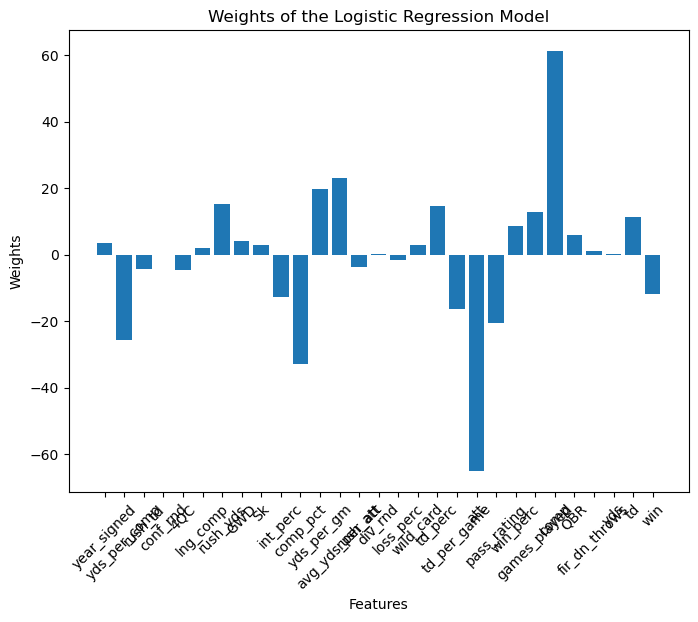

In [45]:
plt.figure(figsize=(8, 6))
plt.bar(X_train.select_dtypes(exclude="object").columns, feature_weights)
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('Weights of the Logistic Regression Model')
plt.xticks(rotation=45)
plt.show()

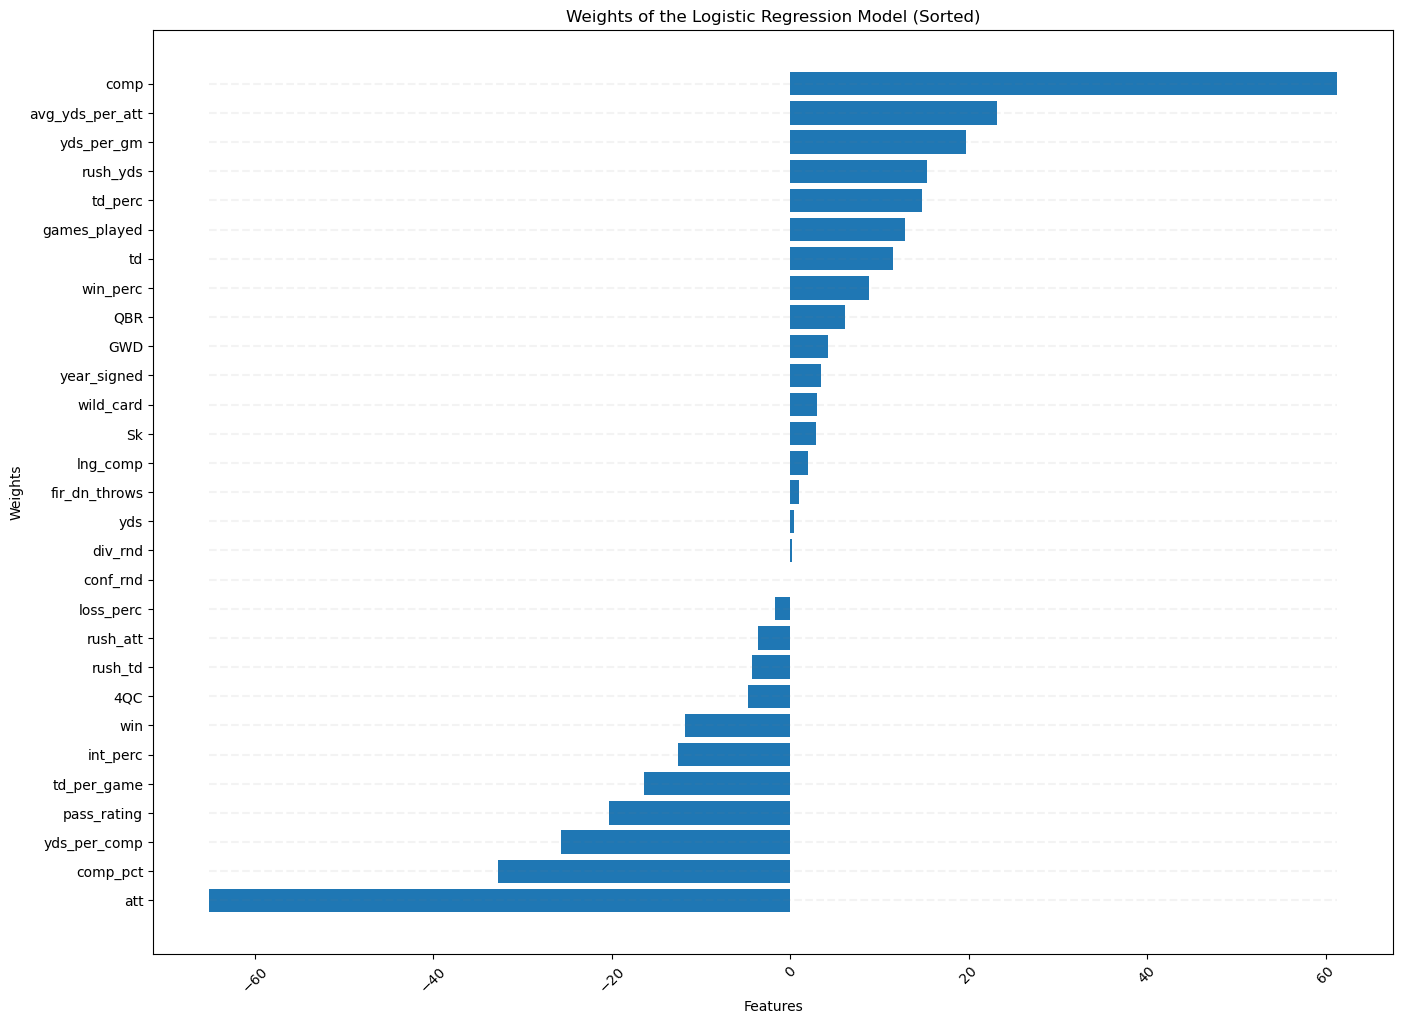

In [64]:
feature_names = X_train.select_dtypes(exclude="object").columns

sorted_indices = np.argsort(feature_weights)
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_weights = feature_weights[sorted_indices]
plt.figure(figsize=(16, 12))

plt.barh(sorted_feature_names, sorted_weights)
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('Weights of the Logistic Regression Model (Sorted)')
plt.xticks(rotation=45)
plt.hlines(sorted_feature_names, xmin=min(sorted_weights), xmax=max(sorted_weights), color='grey', linestyle='--', alpha = .09)

plt.show()